In [1]:
import pandas as pd

# Data provided by the user
data_tuples = [(0.001, 0, 0, 1.0, 0.6459576218885003), (0.001, 1, 0, 0.92, 0.43262703147500514), (0.001, 2, 0, 1.0, 0.7916066652952067), (0.001, 3, 0, 1.0, 0.8092984982513886), (0.002, 0, 0, 1.0, 0.8064184324213125), (0.002, 1, 0, 0.94, 0.710759103065213), (0.002, 2, 0, 0.98, 0.8142357539600905), (0.002, 3, 0, 0.92, 0.8331619008434479), (0.005, 0, 0, 0.2076923076923077, 0.21950216004937256), (0.005, 1, 0, 0.8615384615384616, 0.687718576424604), (0.005, 2, 0, 0.8153846153846154, 0.7574573133100185), (0.005, 3, 0, 0.9076923076923077, 0.8714256325858877), (0.01, 0, 0, 0.8730769230769231, 0.7751491462662004), (0.01, 1, 0, 0.5461538461538461, 0.5161489405472125), (0.01, 2, 0, 0.8615384615384616, 0.8380991565521497), (0.01, 3, 0, 0.9153846153846154, 0.8983748199958856), (0.05, 0, 0, 0.6681818181818182, 0.6453404649249126), (0.05, 1, 0, 0.2053030303030303, 0.21024480559555647), (0.05, 2, 0, 0.825, 0.8450936021394775), (0.05, 3, 0, 0.8765151515151515, 0.880065830076116), (0.1, 0, 0, 0.8850661625708884, 0.8784200781732154), (0.1, 1, 0, 0.780718336483932, 0.7708290475210862), (0.1, 2, 0, 0.7848771266540643, 0.7710347665089488), (0.1, 3, 0, 0.8816635160680529, 0.8784200781732154), (0.3, 0, 0, 0.9044738500315059, 0.8998148529109237), (0.3, 1, 0, 0.883301827347196, 0.8810944250154289), (0.3, 2, 0, 0.8988027725267801, 0.9055749845710759), (0.3, 3, 0, 0.9151858853182104, 0.9203867516971816), (0.5, 0, 0, 0.9307634164777022, 0.9277926352602345), (0.5, 1, 0, 0.9115646258503401, 0.9094836453404649), (0.5, 2, 0, 0.9306122448979591, 0.92902694918741), (0.5, 3, 0, 0.9325018896447468, 0.9339642048961119), (0.8, 0, 0, 0.9471894189891356, 0.9438387163135158), (0.8, 1, 0, 0.9542749173358526, 0.949598847973668), (0.8, 2, 0, 0.956542276806802, 0.9539189467187822), (0.8, 3, 0, 0.9435994331601323, 0.9423986833984777), (1, 0, 0, 0.9546048083570167, 0.9533017897551944), (1, 1, 0, 0.9491512404946616, 0.9463073441678667), (1, 2, 0, 0.957830862585452, 0.9567990125488582), (1, 3, 0, 0.9473845917505185, 0.9487759720222176)]
# Define column names
columns = ['Percentage', 'Cut Point', 'Trial', 'Train Accuracy', 'Test Accuracy']

# Create DataFrame
df = pd.DataFrame(data_tuples, columns=columns)

# Calculate mean and standard deviation for test accuracies
# Assuming that the provided data has a pattern where every three tuples belong to the same
# percentage and cut point but different trials
df['Mean Train Accuracy'] = df.groupby(['Percentage', 'Cut Point'])['Train Accuracy'].transform('mean')
df['Median Train Accuracy'] = df.groupby(['Percentage', 'Cut Point'])['Train Accuracy'].transform('median')
df['Mean Test Accuracy'] = df.groupby(['Percentage', 'Cut Point'])['Test Accuracy'].transform('mean')
df['Median Test Accuracy'] = df.groupby(['Percentage', 'Cut Point'])['Test Accuracy'].transform('median')

# Now we display the DataFrame, though for brevity I'm only showing the first few rows here.
df.head()


,Percentage,Cut Point,Trial,Train Accuracy,Test Accuracy,Mean Train Accuracy,Median Train Accuracy,Mean Test Accuracy,Median Test Accuracy
0,0.001,0,0,1.00,0.645958,1.00,1.00,0.645958,0.645958
1,0.001,1,0,0.92,0.432627,0.92,0.92,0.432627,0.432627
2,0.001,2,0,1.00,0.791607,1.00,1.00,0.791607,0.791607
3,0.001,3,0,1.00,0.809298,1.00,1.00,0.809298,0.809298
4,0.002,0,0,1.00,0.806418,1.00,1.00,0.806418,0.806418


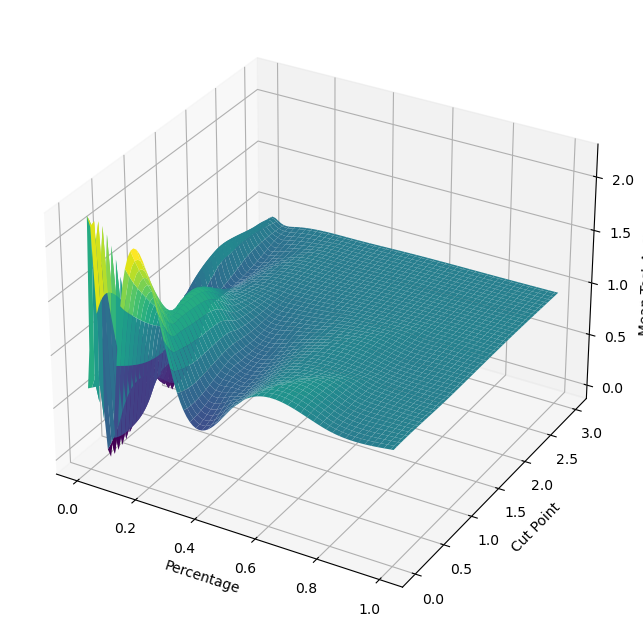

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# Create grid values
xi = np.linspace(df['Percentage'].min(), df['Percentage'].max(), 100)
yi = np.linspace(df['Cut Point'].min(), df['Cut Point'].max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolate
zi = griddata((df['Percentage'], df['Cut Point']), df['Mean Test Accuracy'], (xi, yi), method='cubic')

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xi, yi, zi, cmap='viridis')
ax.set_xlabel('Percentage')
ax.set_ylabel('Cut Point')
ax.set_zlabel('Mean Test Accuracy')
plt.show()

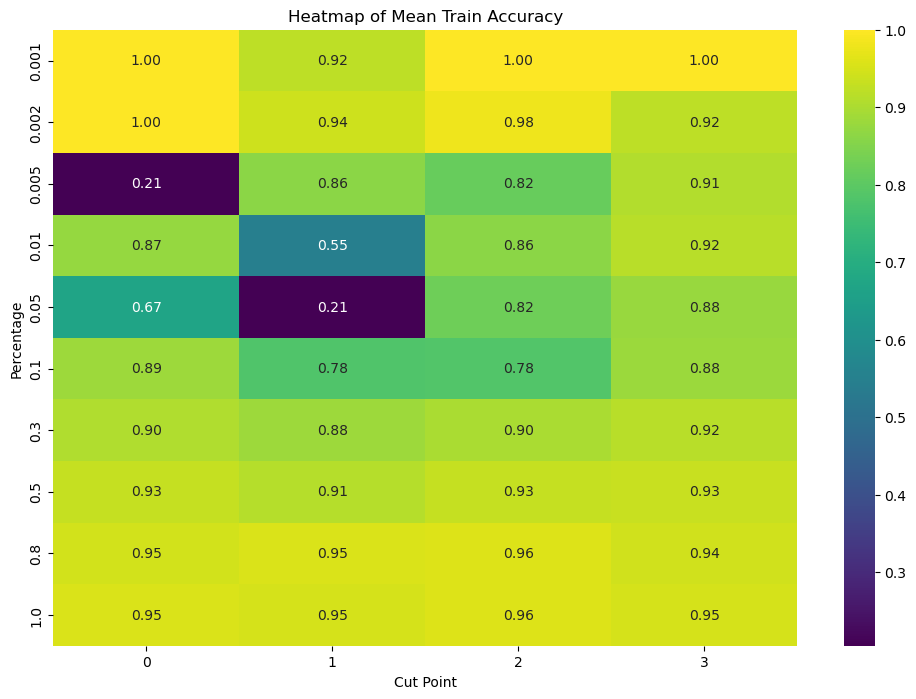

In [3]:
# For the heatmap, we will use the mean test accuracy, aggregated over trials for each combination of 'Percentage' and 'Cut Point'

# We will pivot the dataframe to get the mean test accuracy for each combination of 'Percentage' and 'Cut Point'
heatmap_data = df.pivot_table(index='Percentage', columns='Cut Point', values='Mean Train Accuracy', aggfunc='mean')

# Generating the heatmap using seaborn
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt=".2f")
plt.title('Heatmap of Mean Train Accuracy')
plt.xlabel('Cut Point')
plt.ylabel('Percentage')
plt.show()


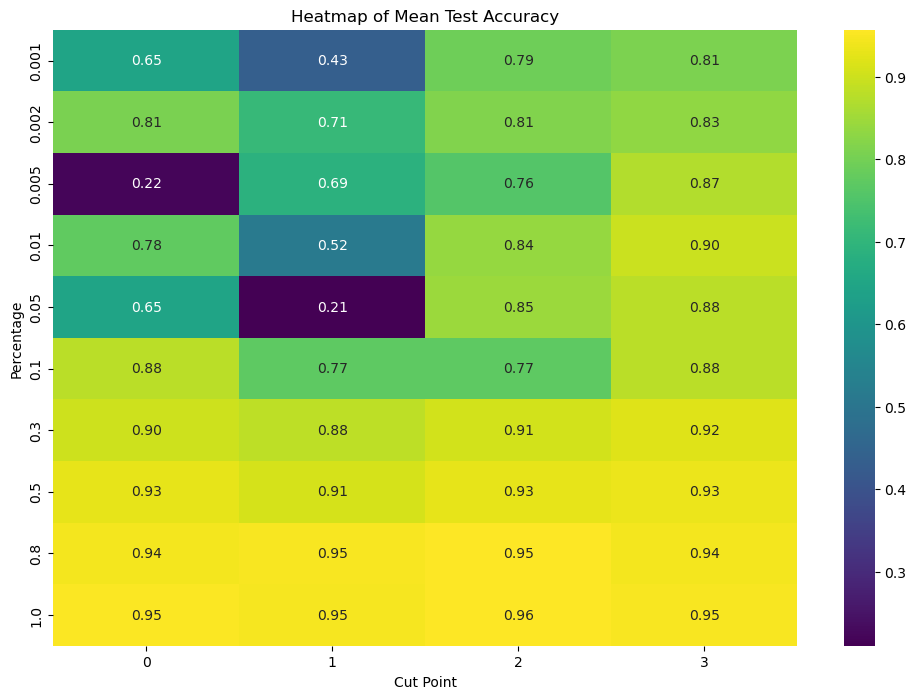

In [4]:
# For the heatmap, we will use the mean test accuracy, aggregated over trials for each combination of 'Percentage' and 'Cut Point'

# We will pivot the dataframe to get the mean test accuracy for each combination of 'Percentage' and 'Cut Point'
heatmap_data = df.pivot_table(index='Percentage', columns='Cut Point', values='Mean Test Accuracy', aggfunc='mean')

# Generating the heatmap using seaborn
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt=".2f")
plt.title('Heatmap of Mean Test Accuracy')
plt.xlabel('Cut Point')
plt.ylabel('Percentage')
plt.show()


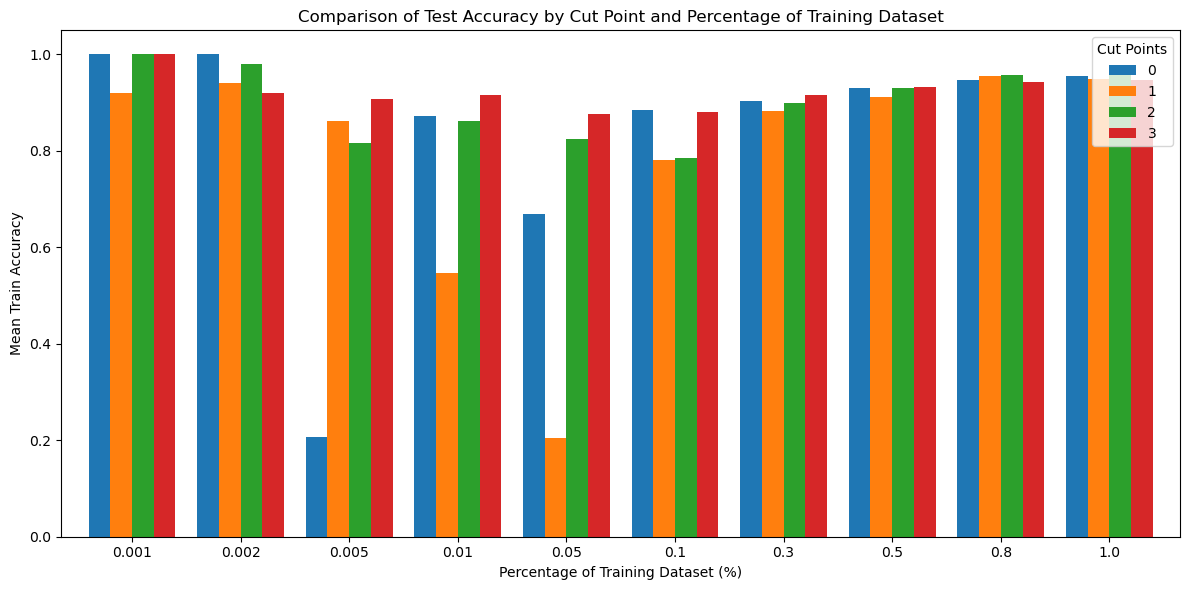

In [5]:
# Create a bar graph for comparing the test accuracies of different cut points at each percentage level.

# Find the mean test accuracy for each cut point at each percentage level.
mean_accuracies = df.groupby(['Cut Point', 'Percentage']).mean()['Mean Train Accuracy'].unstack(0)

# Plotting
mean_accuracies.plot(kind='bar', figsize=(12, 6), width=0.8)

plt.title('Comparison of Test Accuracy by Cut Point and Percentage of Training Dataset')
plt.xlabel('Percentage of Training Dataset (%)')
plt.ylabel('Mean Train Accuracy')
plt.xticks(rotation=0)  # Rotate x-axis labels to show them horizontally.
plt.legend(title='Cut Points')
plt.tight_layout()
plt.show()


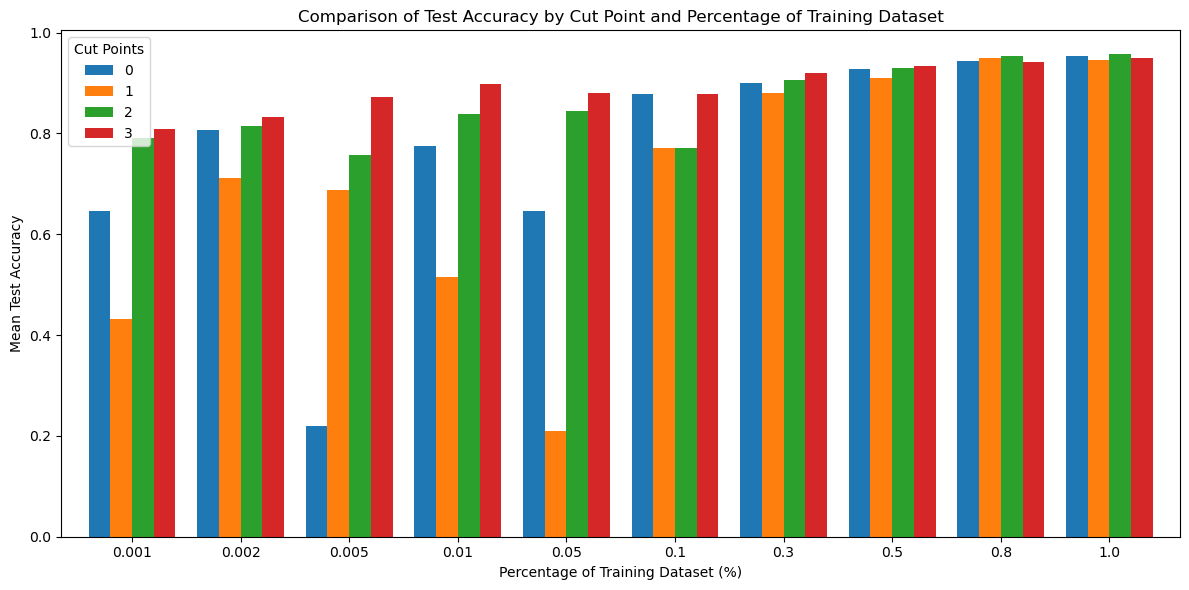

In [6]:
# Create a bar graph for comparing the test accuracies of different cut points at each percentage level.

# Find the mean test accuracy for each cut point at each percentage level.
mean_accuracies = df.groupby(['Cut Point', 'Percentage']).mean()['Mean Test Accuracy'].unstack(0)

# Plotting
mean_accuracies.plot(kind='bar', figsize=(12, 6), width=0.8)

plt.title('Comparison of Test Accuracy by Cut Point and Percentage of Training Dataset')
plt.xlabel('Percentage of Training Dataset (%)')
plt.ylabel('Mean Test Accuracy')
plt.xticks(rotation=0)  # Rotate x-axis labels to show them horizontally.
plt.legend(title='Cut Points')
plt.tight_layout()
plt.show()


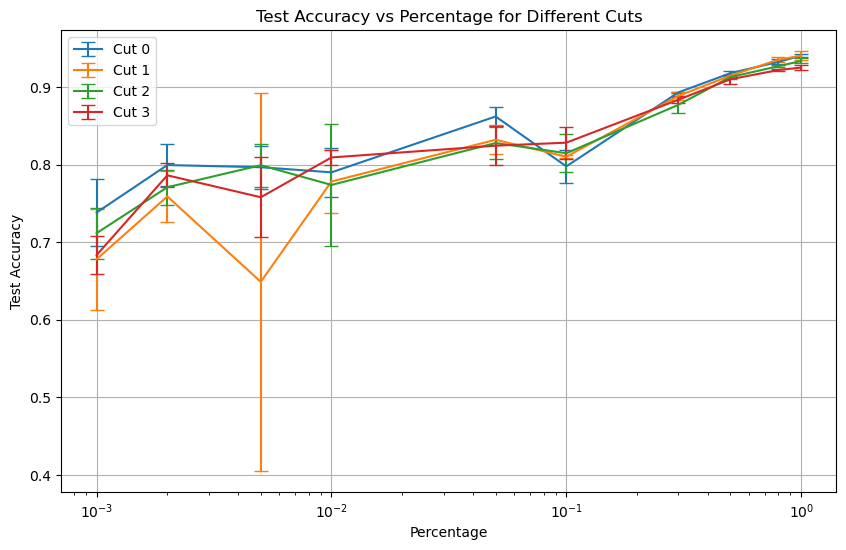

In [75]:
# Calculate mean and standard deviation for test accuracies
# Assuming that the provided data has a pattern where every three tuples belong to the same
# percentage and cut point but different trials
df['Mean Test Accuracy'] = df.groupby(['Percentage', 'Cut Point'])['Test Accuracy'].transform('mean')
df['Std Test Accuracy'] = df.groupby(['Percentage', 'Cut Point'])['Test Accuracy'].transform('std')

# Plotting
plt.figure(figsize=(10, 6))

# Iterate over each unique cut point
for cut_point in df['Cut Point'].unique():
    cut_df = df[df['Cut Point'] == cut_point]

    # Calculate mean and standard deviation for each percentage
    means = cut_df.groupby('Percentage')['Mean Test Accuracy'].mean()
    stds = cut_df.groupby('Percentage')['Std Test Accuracy'].mean()

    # Plot with error bars for uncertainty
    plt.errorbar(means.index, means, yerr=stds, capsize=5, label=f'Cut {cut_point}')
    #plt.errorbar(means.index, means, capsize=5, label=f'Cut {cut_point}')


plt.xlabel('Percentage')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy vs Percentage for Different Cuts')
plt.legend()
#x log
plt.xscale('log')
plt.grid(True)
plt.show()

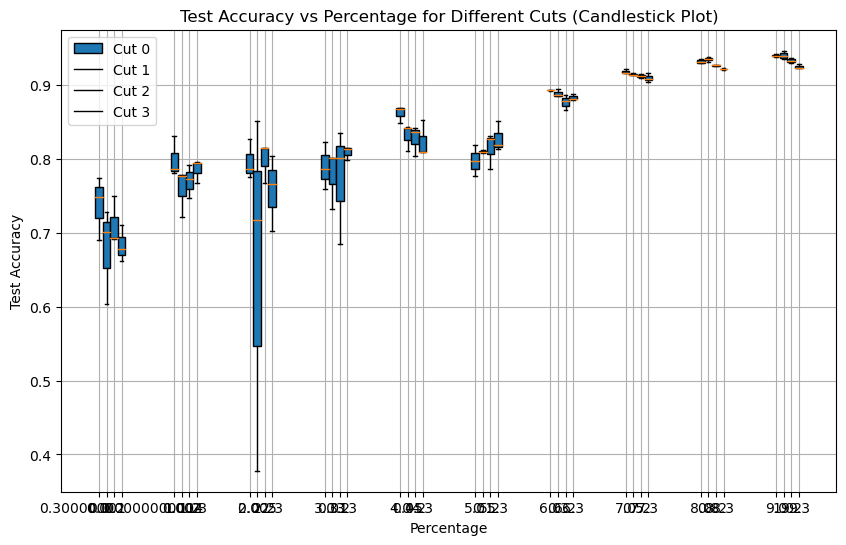

In [76]:

import numpy as np


# Define column names
columns = ['Percentage', 'Cut Point', 'Trial', 'Train Accuracy', 'Test Accuracy']

# Create DataFrame
df = pd.DataFrame(data_tuples, columns=columns)

# Calculate mean and standard deviation for test accuracies
df['Mean Test Accuracy'] = df.groupby(['Percentage', 'Cut Point'])['Test Accuracy'].transform('mean')
df['Std Test Accuracy'] = df.groupby(['Percentage', 'Cut Point'])['Test Accuracy'].transform('std')

# Unique percentages and cut points
percentages = df['Percentage'].unique()
cut_points = df['Cut Point'].unique()

# Plotting
plt.figure(figsize=(10, 6))


# Iterate over each unique cut point
for cut_point in cut_points:
    cut_df = df[df['Cut Point'] == cut_point]

    # Create a list of arrays, each containing test accuracies for a given percentage
    data = [cut_df[cut_df['Percentage'] == p]['Test Accuracy'].values for p in percentages]

    # Position for the candle plots for this cut point
    positions = np.array(range(len(percentages))) + cut_point * 0.1  # slight offset for each cut point

    # Create boxplot (candlestick plot)
    plt.boxplot(data, positions=positions, widths=0.1, patch_artist=True, labels=percentages if cut_point == 1 else None)

plt.xlabel('Percentage')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy vs Percentage for Different Cuts (Candlestick Plot)')
plt.legend([f'Cut {cp}' for cp in cut_points])
plt.grid(True)
plt.show()


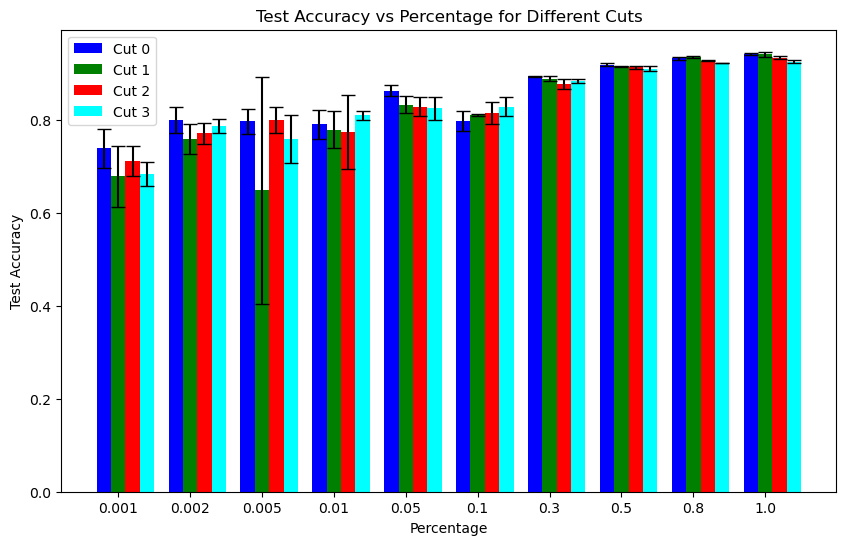

In [77]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# Group by 'Percentage' and 'Cut Point' and calculate mean and std of 'Test Accuracy'
grouped = df.groupby(['Percentage', 'Cut Point'])['Test Accuracy'].agg(['mean', 'std']).reset_index()

# Set figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Colors for each 'Cut Point'
colors = ['blue', 'green', 'red', 'cyan']

# Set positions of the bars
positions = np.arange(len(grouped['Percentage'].unique()))

# Width of each bar
bar_width = 0.2

# Loop through each 'Cut Point'
for i, cut in enumerate(grouped['Cut Point'].unique()):
    # Filter the data for the current 'Cut Point'
    cut_data = grouped[grouped['Cut Point'] == cut]
    
    # Calculate positions for the current 'Cut Point'
    cut_positions = positions + (i * bar_width)
    
    # Plot bars
    ax.bar(cut_positions, cut_data['mean'], width=bar_width, color=colors[i], yerr=cut_data['std'], capsize=5, label=f'Cut {cut}')

# Set x-ticks positions and labels
ax.set_xticks(positions + bar_width)
ax.set_xticklabels(grouped['Percentage'].unique())

# Set labels and title
ax.set_xlabel('Percentage')
ax.set_ylabel('Test Accuracy')
ax.set_title('Test Accuracy vs Percentage for Different Cuts')

# Display legend
ax.legend()

# Show plot
plt.show()


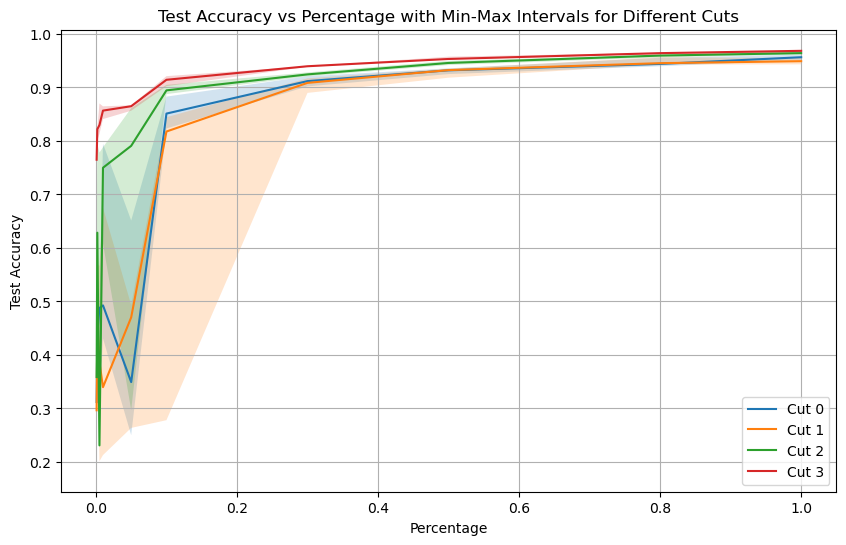

In [26]:
# Adjusting the code to use minimum, maximum, and median values instead of mean and standard deviation

# Calculate median, min, and max for test accuracies
df['Median Test Accuracy'] = df.groupby(['Percentage', 'Cut Point'])['Test Accuracy'].transform('median')
df['Min Test Accuracy'] = df.groupby(['Percentage', 'Cut Point'])['Test Accuracy'].transform('min')
df['Max Test Accuracy'] = df.groupby(['Percentage', 'Cut Point'])['Test Accuracy'].transform('max')

# Plotting
plt.figure(figsize=(10, 6))

# Iterate over each unique cut point
for cut_point in df['Cut Point'].unique():
    cut_df = df[df['Cut Point'] == cut_point]

    # Calculate median, min, and max for each percentage
    medians = cut_df.groupby('Percentage')['Median Test Accuracy'].median()
    mins = cut_df.groupby('Percentage')['Min Test Accuracy'].min()
    maxs = cut_df.groupby('Percentage')['Max Test Accuracy'].max()

    # Plot median values
    plt.plot(medians.index, medians, label=f'Cut {cut_point}')

    # Plot intervals between min and max as shaded areas
    plt.fill_between(medians.index, mins, maxs, alpha=0.2)

plt.xlabel('Percentage')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy vs Percentage with Min-Max Intervals for Different Cuts')
plt.legend()
plt.grid(True)
plt.show()


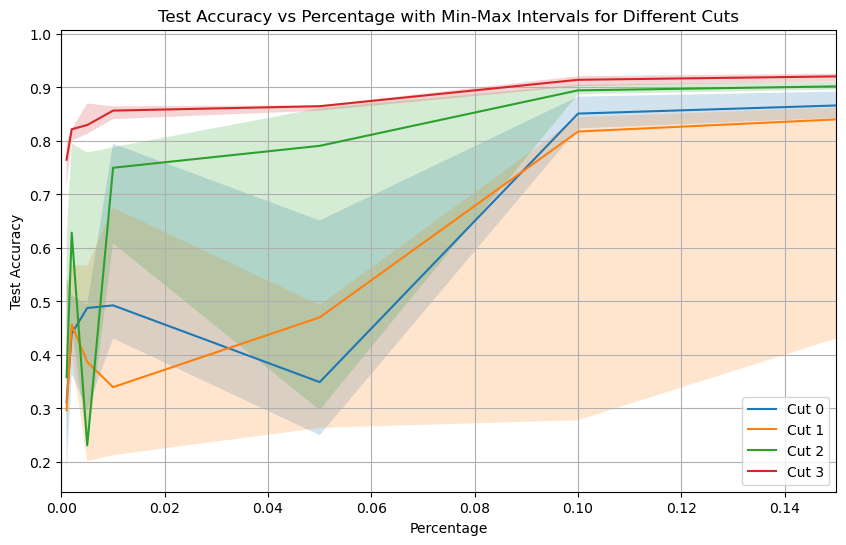

In [27]:
# Adjusting the code to use minimum, maximum, and median values instead of mean and standard deviation

# Calculate median, min, and max for test accuracies
df['Median Test Accuracy'] = df.groupby(['Percentage', 'Cut Point'])['Test Accuracy'].transform('median')
df['Min Test Accuracy'] = df.groupby(['Percentage', 'Cut Point'])['Test Accuracy'].transform('min')
df['Max Test Accuracy'] = df.groupby(['Percentage', 'Cut Point'])['Test Accuracy'].transform('max')

# Plotting
plt.figure(figsize=(10, 6))

# Iterate over each unique cut point
for cut_point in df['Cut Point'].unique():
    cut_df = df[df['Cut Point'] == cut_point]

    # Calculate median, min, and max for each percentage
    medians = cut_df.groupby('Percentage')['Median Test Accuracy'].median()
    mins = cut_df.groupby('Percentage')['Min Test Accuracy'].min()
    maxs = cut_df.groupby('Percentage')['Max Test Accuracy'].max()

    # Plot median values
    plt.plot(medians.index, medians, label=f'Cut {cut_point}')

    # Plot intervals between min and max as shaded areas
    plt.fill_between(medians.index, mins, maxs, alpha=0.2)

plt.xlabel('Percentage')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy vs Percentage with Min-Max Intervals for Different Cuts')
plt.legend()
plt.grid(True)
#plt.xscale('log')
#x limit to 0.3
plt.xlim(0, 0.15)
plt.show()


In [62]:
conv_indices = [0, 2, 4]
idx = 2
for idx in conv_indices[:idx]:
    print(idx)

print('##################')

for idx in conv_indices[idx:]:
    print(idx)

0
2
##################
4
